# 神经网络分类模型

## sklearn MLPClassifier 多层感知器神经网络，进行多分类数字识别。

* 数据集用sklearn自带，数字0~9分类
* 采用MLP Classifier

训练(准确率): 0.9956709956709957
[1 4 2 0 1 3 8 2 2 2 3 8 6 1 9 5 9 1 7 0 6 3 3 9 9 3 3 9 0 9 1 9 2 9 7 4 2
 7 7 7 1 8 4 7 9 2 7 6 6 1 1 4 4 5 1 6 4 8 9 7 2 8 7 7 9 3 4 6 4 7 3 7 5 9
 0 9 3 1 8 1 3 0 8 8 3 7 2 0 0 9 3 1 5 7 2 9 8 7 5 0 1 7 9 6 0 6 4 1 0 2 0
 1 4 4 7 1 8 0 4 4 9 8 0 0 0 6 8 5 6 1 9 9 4 4 6 3 9 4 7 1 6 4 3 2 4 7 6 6
 0 3 8 0 3 6 9 7 5 4 1 8 2 4 5 5 2 4 8 7 4 7 3 5 3 3 7 3 7 7 4 2]
[1 9 2 0 1 3 8 2 2 6 3 8 6 1 9 5 9 8 7 0 6 3 3 9 9 3 3 9 0 9 8 9 2 9 7 4 2
 7 7 7 1 8 4 7 7 2 7 6 6 1 1 4 4 5 8 6 4 1 9 7 2 8 7 7 9 3 4 6 4 7 3 7 5 9
 0 9 3 1 8 1 3 0 8 8 3 7 2 0 0 9 3 1 5 7 2 9 8 7 5 0 1 7 4 6 0 6 4 1 0 2 0
 1 4 4 5 1 8 0 4 4 9 8 0 0 0 6 1 5 6 1 9 9 4 4 6 3 7 4 7 1 6 4 3 2 4 7 6 6
 0 3 8 0 3 6 9 7 5 9 1 8 2 4 5 5 2 0 1 7 4 7 3 5 3 3 7 3 7 7 4 2]


D:\anaconda3\envs\swin\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


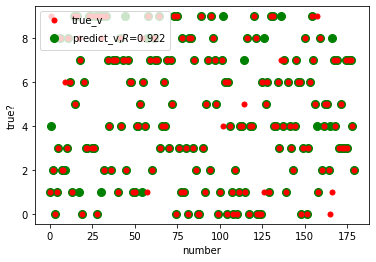

测试准确率： 0.9222222222222223


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 测试集，画图对预测值和实际值进行比较
def test_validate(x_test, y_test, y_predict, classifier):
    x = range(len(y_test))
    #print(x)
    plt.plot(x, y_test, "ro", markersize=5, zorder=3, label=u"true_v")
    plt.plot(x, y_predict, "go", markersize=8, zorder=2, label=u"predict_v,$R$=%.3f" % classifier.score(x_test, y_test))
    plt.legend(loc="upper left")
    plt.xlabel("number")
    plt.ylabel("true?")
    plt.show()

# 神经网络数字分类
def multi_class_nn():
    digits = datasets.load_digits()  # 加载0~9数字数据集
    x = digits['data']
    y = digits['target']

    # 对数据的训练集进行标准化
    ss = StandardScaler()
    x_regular = ss.fit_transform(x)
    # 划分训练集与测试集
    x_train, x_test, y_train, y_test = train_test_split(x_regular, y, test_size=0.1)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)
    clf.fit(x_train, y_train)
    # 模型效果获取
    r = clf.score(x_train, y_train)
    print("训练(准确率):", r)
    # 预测
    y_predict = clf.predict(x_test)  # 预测
    print(y_predict)
    print(y_test)
    # 绘制测试集结果验证
    test_validate(x_test=x_test, y_test=y_test, y_predict=y_predict, classifier=clf)
    print("测试准确率：",np.sum(y_predict == y_test)/y_test.shape[0])
    

multi_class_nn()

## 自定义单层感知器

[3.3  3.32 3.34 ... 6.94 6.96 6.98]
[0.   0.   0.   ... 5.08 5.08 5.08]
[ 1  1  1 ... -1 -1 -1]
[[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]
xx1.min() 3.3


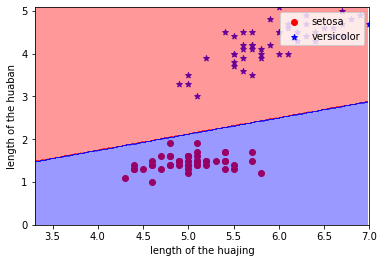

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义感知器
class Perceptron(object):
    """
        eta:学习率
        n_iter:权重向量训练的次数
        w_：神经分叉权重向量
        errors_：用于记录神经元判断出错的次数
    """
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        pass


    def net_input(self, X):
        """
            做点积运算
            z = W0*1 + W1*X1 +.... Wn*Xn
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
        pass

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        pass

    """
        输入训练数据，培训神经元
        x 输入样本向量， y对应的样本分类
        x shape[n_samples, n_features]
        x:[[1, 2, 3], [4, 5, 6]]
        x.shape[1] = 2; x.shape[2] = 3
    """
    def fit(self, X, y):
        # 初始化权重为0 加一是因为步调函数阈值
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        

        for _ in range(self.n_iter):
            errors = 0
           
            for xi, target in zip(X, y):
                # update =η * (y - y')
                update = self.eta * (target - self.predict(xi))
                
                """
                xi是一个向量
                update * xi 等价：
                [▽W(1) = X[1]*update, ▽w(2) = X[2]*update, ▽w(3) = X[3]*update]
                """
                
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                self.errors_.append(errors)
    
                pass
            pass
        pass

from matplotlib.colors import ListedColormap
def plot_decision_regions(x, y, classifier, resolution = 0.02):
    marker = ('s', 'x', 'o', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[: , 0].min() - 1, x[: , 0].max()
    x2_min, x2_max = x[: , 1].min() - 1, x[: , 1].max()
    #print x1_min, x1_max, x2_min, x2_max
    # 185 从3.3- 6.98 每隔0.02
    # 255 从0  - 5.08 每隔0.02
    # xx1   从3.3 - 6.98 为一行  有185行相同的数据
    # xx2   从0   - 5.08 为一列  第一行全为0 第二行全1 (255, 185)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # print np.arange(x1_min, x1_max, resolution).shape
    # print np.arange(x1_min, x1_max, resolution)
    # print np.arange(x2_min, x2_max, resolution).shape
    # print np.arange(x2_min, x2_max, resolution)
    # print xx2.shape
    # print xx2
    # 相当于 np.arange(x1_min, x1_max, resolution) np.arange(x2_min, x2_max, resolution)
    # 已经在分类了站如果是3.3 0 则为1 6.94 5.08 则-1
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print(xx1.ravel())
    print(xx2.ravel())
    print(z)

    z = z.reshape(xx1.shape)
    print(z)
    # 在两个分类之间画分界线
    plt.contourf(xx1, xx2, z, alpha = 0.4, cmap = cmap)
    plt.xlim(x1_min, x1_max)
    print("xx1.min()", x1_min)
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('length of the huajing')
    plt.ylabel('length of the huaban')
    plt.legend(loc='upper right')
    plt.show()


## X = np.array([[1, 2, 3], [4, 5, 6]])
# print X.shape
## y = [1, -1]
df = pd.read_csv('./data/iris.data', header = None)
## print df.head(10)
y = df.loc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)
x = df.iloc[0:100, [0, 2]].values
plt.scatter(x[:50, 0], x[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='*', label='versicolor')
plt.xlabel('length of the huajing')
plt.ylabel('length of the huaban')
plt.legend(loc = 'upper right')
# plt.show()
p1 = Perceptron(eta = 0.1)
p1.fit(x, y)
# plt.plot(range(1, len(p1.errors_) + 1), p1.errors_, marker = 'o')
# plt.xlabel('Epochs')
 # plt.ylabel('error sort')
# plt.show()
plot_decision_regions(x, y, p1)